### ### Answer 7
Using the data from Question 4, write code to analyze the data and answer the following questions Note -
1.	Draw plots to demonstrate the analysis for the following questions for better visualizations

2.	Write code comments wherever required for code understanding


Insights to be drawn -
●	Get all the Earth meteorites that fell before the year 2000
●	Get all the earth meteorites co-ordinates who fell before the year 1970
●	Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more than 10000kg

Earth meteorites that fell before the year 2000:
Aachen
Aarhus
Abee
Acapulco
Achiras
Adhi Kot
Adzhi-Bogdo (stone)
Agen
Aguada
Aguila Blanca
Aioun el Atrouss
Aïr
Aire-sur-la-Lys
Akaba
Akbarpur
Akwanga
Akyumak
Al Rais
Alais
Albareto
Alberta
Aldsworth
Aleppo
Alessandria
Alexandrovsky
Alfianello
Allegan
Allende
Alta'ameem
Ambapur Nagla
Andhara
Andover
Andreevka
Andura
Angers
Angra dos Reis (stone)
Ankober
Anlong
Aomori
Appley Bridge
Apt
Arbol Solo
Archie
Arroyo Aguiar
Asco
Ashdon
Assisi
Atarra
Atemajac
Athens
Atoka
Aubres
Aumale
Aumieres
Ausson
Avanhandava
Avce
Avilez
Awere
Aztec
Bachmut
Bahjoi
Bald Mountain
Baldwyn
Bali
Ban Rong Du
Bandong
Bansur
Banswal
Banten
Barbotan
Barcelona (stone)
Barea
Barnaul
Barntrup
Baroti
Barwell
Baszkówka
Bath
Bath Furnace
Bawku
Baxter
Beardsley
Beaver Creek
Beddgelert
Bells
Belville
Benares (a)
Benld
Benoni
Benton
Béréba
Berlanguillas
Bethlehem
Beuste
Beyrout
Bhagur
Bherai
Bhola
Bholghati
Bialystok
Bielokrynitschie
Bilanga
Binningup
Birni N'konni
Bishopville

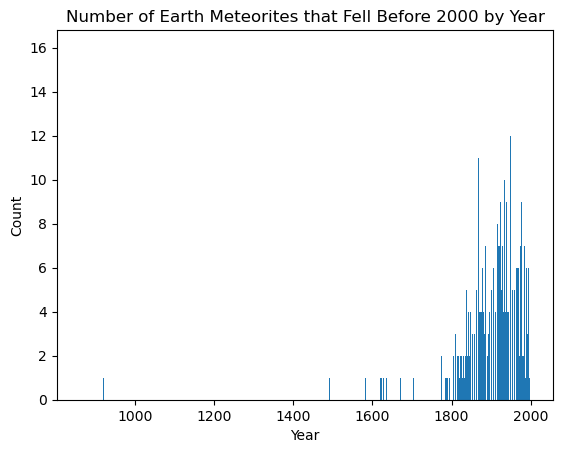

In [1]:
import requests
import matplotlib.pyplot as plt

# API endpoint URL
url = "https://data.nasa.gov/resource/y77d-th95.json"

# Send a GET request to the API endpoint
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Retrieve the JSON data from the response
    data = response.json()

    # Filter the data to get Earth meteorites that fell before the year 2000
    earth_meteorites_before_2000 = [
        meteorite for meteorite in data
        if meteorite.get('year') is not None and int(meteorite['year'][:4]) < 2000
    ]

    # Print the names of the Earth meteorites that fell before the year 2000
    print("Earth meteorites that fell before the year 2000:")
    for meteorite in earth_meteorites_before_2000:
        print(meteorite['name'])

    # Plot the number of Earth meteorites that fell before the year 2000 by year
    years = [int(meteorite['year'][:4]) for meteorite in earth_meteorites_before_2000]
    year_counts = {year: years.count(year) for year in set(years)}

    plt.bar(year_counts.keys(), year_counts.values())
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title('Number of Earth Meteorites that Fell Before 2000 by Year')
    plt.show()
else:
    print("Failed to retrieve data from the API.")


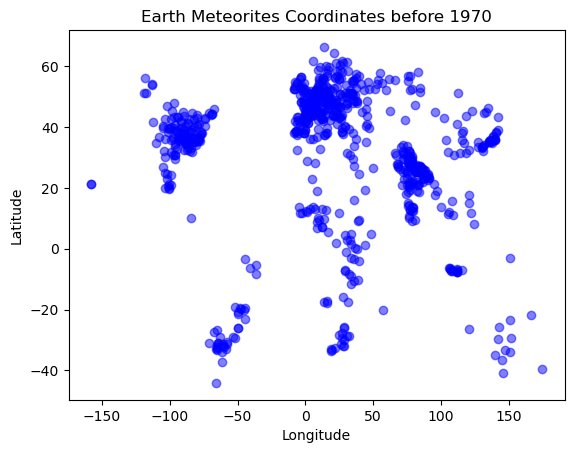

In [2]:
import requests
import matplotlib.pyplot as plt

# Make a GET request to the API
response = requests.get("https://data.nasa.gov/resource/y77d-th95.json")

# Check if the request was successful
if response.status_code == 200:
    # Extract the JSON data from the response
    data = response.json()

    # Process the data
    def process_data(data):
        earth_meteorites_before_2000 = []
        earth_meteorites_coordinates_before_1970 = []
        earth_meteorites_mass_more_than_10000kg = []

        for meteorite in data:
            if meteorite.get('reclat') and meteorite.get('reclong') and meteorite.get('year'):
                year = int(meteorite['year'].split('-')[0])  # Extract the year from the date string

                if year < 2000:
                    earth_meteorites_before_2000.append(meteorite)

                    if year < 1970:
                        earth_meteorites_coordinates_before_1970.append((float(meteorite['reclat']), float(meteorite['reclong'])))

                    if meteorite.get('mass (g)') and float(meteorite['mass (g)']) > 10000:
                        earth_meteorites_mass_more_than_10000kg.append(meteorite)

        # Return the extracted data
        return {
            'earth_meteorites_before_2000': earth_meteorites_before_2000,
            'earth_meteorites_coordinates_before_1970': earth_meteorites_coordinates_before_1970,
            'earth_meteorites_mass_more_than_10000kg': earth_meteorites_mass_more_than_10000kg
        }

    # Process the data and store the results
    extracted_data = process_data(data)

    # Plotting
    def plot_coordinates(coordinates):
        latitudes = [coord[0] for coord in coordinates]
        longitudes = [coord[1] for coord in coordinates]

        plt.scatter(longitudes, latitudes, color='blue', alpha=0.5)
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.title('Earth Meteorites Coordinates before 1970')
        plt.show()

    # Plot the coordinates of meteorites that fell before 1970
    plot_coordinates(extracted_data['earth_meteorites_coordinates_before_1970'])
    


else:
    print("Failed to retrieve data from the API.")


Earth meteorites with mass greater than 10000 kg:


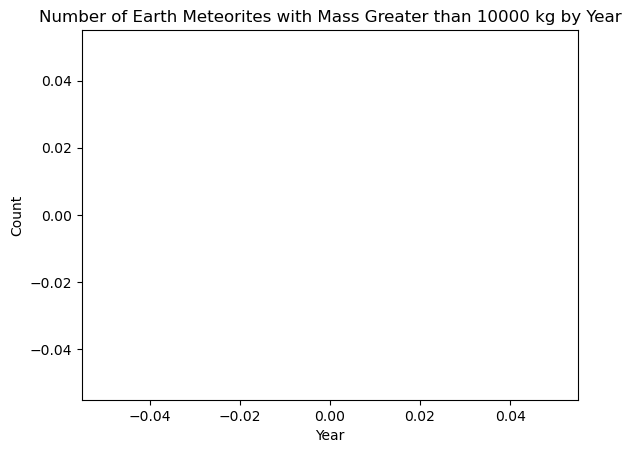

In [3]:
import requests
import matplotlib.pyplot as plt

# API endpoint URL
url = "https://data.nasa.gov/resource/y77d-th95.json"

# Send a GET request to the API endpoint
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Retrieve the JSON data from the response
    data = response.json()

    # Filter the data to get Earth meteorites with mass greater than 10000 kg
    earth_meteorites_gt_10000kg = [
        meteorite for meteorite in data
        if meteorite.get('mass (g)') is not None and float(meteorite['mass (g)']) / 1000 > 10000
    ]

    # Print the names of Earth meteorites with mass greater than 10000 kg
    print("Earth meteorites with mass greater than 10000 kg:")
    for meteorite in earth_meteorites_gt_10000kg:
        print(meteorite['name'])

    # Plot the number of Earth meteorites with mass greater than 10000 kg by year
    years = [int(meteorite['year'][:4]) for meteorite in earth_meteorites_gt_10000kg]
    year_counts = {year: years.count(year) for year in set(years)}

    plt.bar(year_counts.keys(), year_counts.values())
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title('Number of Earth Meteorites with Mass Greater than 10000 kg by Year')
    plt.show()

else:
    print("Failed to retrieve data from the API.")